## Perceptron

The perceptron is one of the earliest and simplest models of a neuron. It's a linear classifier — it tries to draw a line (or plane) to separate data into two categories.

In [1]:
import random
import math
import matplotlib.pyplot as plt

random.seed(0)
# seeing zero instead of 42 is a bit awkward, isn't it? :D

### Creating a Simple Dataset

We’ll create a small linearly separable dataset — think of it like the $OR$ function:
- $(0, 0) → 0$  
- $(0, 1), (1, 0), (1, 1) → 1$

In [33]:
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
y = [0, 1, 1, 1]
# we are gonna neeed them for binary classification

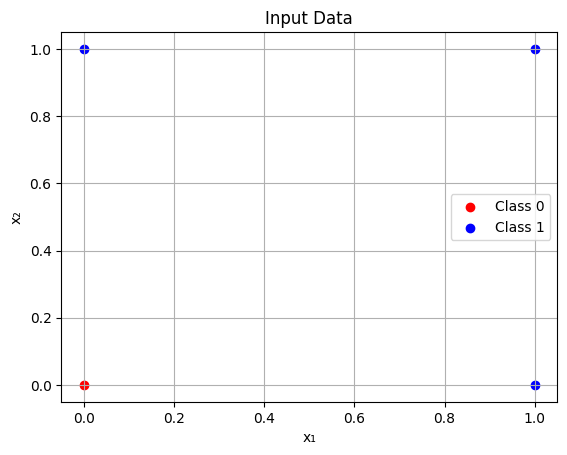

In [34]:
for i, point in enumerate(X):
    if y[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Class 0' if i == 0 else '')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Class 1' if i == 1 else '')

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Input Data')
plt.legend()
plt.grid(True)
plt.show()

### Building the Perceptron

This is a very simple model:
- Start with small random weights and a bias
- For each input, calculate the dot product + bias
- Apply a step function:
```python
if result ≥ 0 → 1, else → 0
```
- After each mistake, adjust weights and bias to reduce future error

In [35]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = [random.uniform(-1, 1) for _ in range(input_size)]
        self.bias = random.uniform(-1, 1)
        self.lr = learning_rate
        self.epochs = epochs

    def predict(self, x):
        result = sum(w * xi for w, xi in zip(self.weights, x)) + self.bias
        return 1 if result >= 0 else 0

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                error = yi - prediction
                
                self.weights = [w + self.lr * error * xij for w, xij in zip(self.weights, xi)]
                self.bias += self.lr * error

In [36]:
model = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
model.fit(X, y)

print("Trained weights:", model.weights)
print("Trained bias:", model.bias)

Trained weights: [0.5675971780695452, 0.1066254521578549]
Trained bias: -0.04680609169528838


##### The upcoming formula is going to perform like:
$w1 * x + w2 * y + b = 0 => y = -(w1*x + b)/w2$

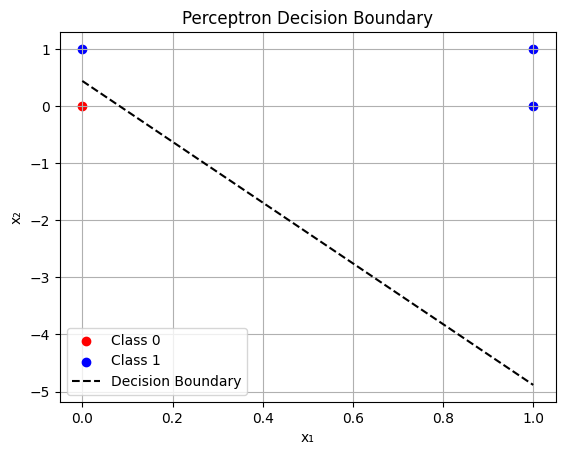

In [38]:
x_vals = [0, 1]
y_vals = []

for x in x_vals:
    w1, w2 = model.weights
    b = model.bias
    y_boundary = -(w1 * x + b) / w2 if w2 != 0 else 0
    y_vals.append(y_boundary)

for i, point in enumerate(X):
    if y[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Class 0' if i == 0 else '')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Class 1' if i == 1 else '')

plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.legend()
plt.title('Perceptron Decision Boundary')
plt.grid(True)
plt.show()

### What We’ve Understood from the Perceptron

The perceptron is a very simple type of neural network that tries to draw a line (or hyperplane in higher dimensions) to **separate data into two classes**. It only works if the data is linearly separable, but it teaches a lot about how learning works.

We saw how the perceptron:
- Makes a prediction using a simple dot product plus bias
- Applies a threshold to turn the result into a binary output
- Updates its weights and bias if it makes a mistake
- Gradually adjusts itself to get closer to correct predictions

Our data was simple — like an OR function — so the perceptron was able to find a line that separates the red and blue points. The final decision boundary showed us exactly what it learned.

This notebook showed how even the smallest neural model already captures the idea of learning from mistakes — the core of how all neural networks learn.